### Diagnosing Autism Spectrum Disorder in Children
**Goal:** Despite the clear benefits of early diagnosis, identifying autism in children remains a challenging task. This is due to the heterogeneity of symptoms, delays in recognizing early signs, and limited availability of accessible and reliable diagnostic tools, particularly in underserved communities. We aim to employ a classification-based approach, which involves categorizing children into two groups—those with autism and those without—based on input features derived from relevant datasets.

**Data Problem:** Finding good datasets for this research is not easy because of many challenges. This means we have a small dataset, and because of that, we need to be careful about overfitting.

**Expected Results:** Finding a proper model with high accuracy to determine whether a child is autistic or not based on input features. 


**Data**

Source: UC Irvine Machine Learning Repository
Link: https://archive.ics.uci.edu/dataset/419/autistic+spectrum+disorder+screening+data+for+children

Data contains 20 features to be utilised for further analysis especially in determining influential autistic traits and improving the classification of ASD cases. In this dataset, we record ten behavioural features (AQ-10-Child) plus ten individuals characteristics that have proved to be effective in detecting the ASD cases from controls in behaviour science. Number of records in the datasets is 292. 

#### Import Neccesary Libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

#### Data Description
1 S/he often notices small sounds when others do not [0: No, 1: Yes]


2 S/he usually concentrates more on the whole picture, rather than the small details [0: No, 1: Yes]


3 In a social group, s/he can easily keep track of several different people’s conversations [0: No, 1: Yes]


4 S/he finds it easy to go back and forth between different activities [0: No, 1: Yes]


5 S/he doesn’t know how to keep a conversation going with his/her peers [0: No, 1: Yes]


6 S/he is good at social chit-chat [0: No, 1: Yes]

7 When s/he is read a story, s/he finds it difficult to work out the character’s intentions or feelings [0: No, 1: Yes]

8 When s/he was in preschool, s/he used to enjoy playing games involving pretending with other children [0: No, 1: Yes]

9 S/he finds it easy to work out what someone is thinking or feeling just by looking at their face [0: No, 1: Yes]

10 S/he finds it hard to make new friends [0: No, 1: Yes]

11 Age [years]

12 Gender [Male or Female]

13 Ethnicity [List of common ethnicities in text format] 

14 Born with jaundice [yes or no]

15 Family member with PDD [yes or no] 

16 Country of residence [List of countries in text format]

17 Used the screening app before [yes or no]

18 Screening Score [The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner]

19 Screening Method Type [0=toddler, 1=child, 2= adolescent, 3= adult]

20 Who is completing the test [Parent, self, caregiver, medical staff, clinician ,etc.]

21 ASD [Yes, No]

In [3]:
ASD = pd.read_csv("Autism-Child-Data.csv")

In [4]:
ASD.shape

(292, 21)

In [5]:
ASD.head()

,a1_score,a2_score,a3_score,a4_score,a5_score,a6_score,a7_score,a8_score,a9_score,a10_score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,class/asd
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES


#### Exploratory Data Analysis

In [6]:
ASD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   a1_score         292 non-null    int64 
 1   a2_score         292 non-null    int64 
 2   a3_score         292 non-null    int64 
 3   a4_score         292 non-null    int64 
 4   a5_score         292 non-null    int64 
 5   a6_score         292 non-null    int64 
 6   a7_score         292 non-null    int64 
 7   a8_score         292 non-null    int64 
 8   a9_score         292 non-null    int64 
 9   a10_score        292 non-null    int64 
 10  age              292 non-null    object
 11  gender           292 non-null    object
 12  ethnicity        292 non-null    object
 13  jundice          292 non-null    object
 14  austim           292 non-null    object
 15  contry_of_res    292 non-null    object
 16  used_app_before  292 non-null    object
 17  result           292 non-null    in

In [7]:
for col in ASD.columns:
    print(f'{col}: \t {ASD[col].nunique()} unique values [{ASD[col].dtype}]')
    print(f'Values: {ASD[col].unique()}')
    print('----------------------------------------------------------------------')

a1_score: 	 2 unique values [int64]
Values: [1 0]
----------------------------------------------------------------------
a2_score: 	 2 unique values [int64]
Values: [1 0]
----------------------------------------------------------------------
a3_score: 	 2 unique values [int64]
Values: [0 1]
----------------------------------------------------------------------
a4_score: 	 2 unique values [int64]
Values: [0 1]
----------------------------------------------------------------------
a5_score: 	 2 unique values [int64]
Values: [1 0]
----------------------------------------------------------------------
a6_score: 	 2 unique values [int64]
Values: [1 0]
----------------------------------------------------------------------
a7_score: 	 2 unique values [int64]
Values: [0 1]
----------------------------------------------------------------------
a8_score: 	 2 unique values [int64]
Values: [1 0]
----------------------------------------------------------------------
a9_score: 	 2 unique values [int

As is seen, some values are ? so I should change them to NaN.

Also, age_desc column has only one value, so I drop this feature.

In addition, age column is object and I should change it to number.

In [8]:
ASD = ASD.replace('?', np.nan)

In [9]:
# Check for Null values
ASD.isna().sum()

a1_score            0
a2_score            0
a3_score            0
a4_score            0
a5_score            0
a6_score            0
a7_score            0
a8_score            0
a9_score            0
a10_score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
class/asd           0
dtype: int64

<Axes: >

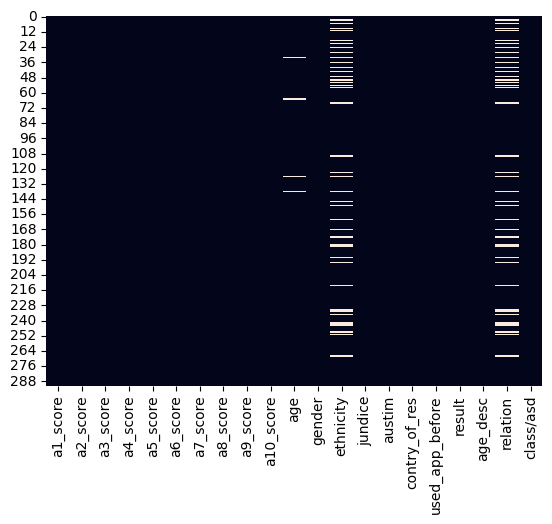

In [10]:
sns.heatmap(ASD.isnull(), cbar=False)

In [11]:
#Drop duplicates and Null values
ASD = ASD.drop_duplicates()
ASD = ASD.dropna()

In [12]:
#Drop Column  
ASD = ASD.drop(columns=['age_desc'])

In [13]:
ASD.shape

(246, 20)

In [14]:
# Age is considered as object, So I change it to int.
ASD['age'] = ASD['age'].astype('int64')

#### Visualize the data

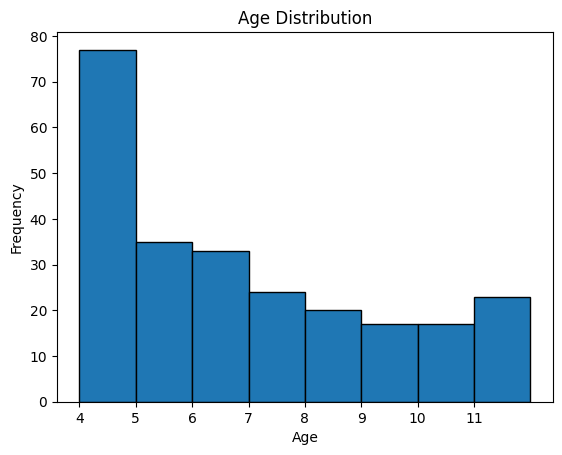

In [16]:
plt.hist(ASD['age'].value_counts().index, bins=range(4, 13), weights=ASD['age'].value_counts().values, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks(range(4, 12))  
plt.show()

As is seen, the number of children with less than 5 years old are greater but from 5 to 11 distribution is somehow uniform.

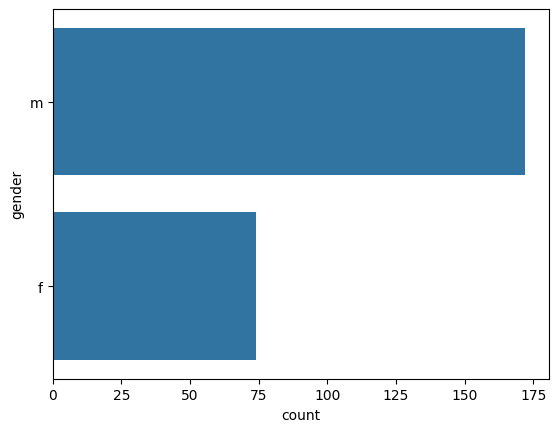

In [17]:
sns.countplot(ASD['gender']);

As is seen, the number of male children is more; so, we can consider it while create training data.

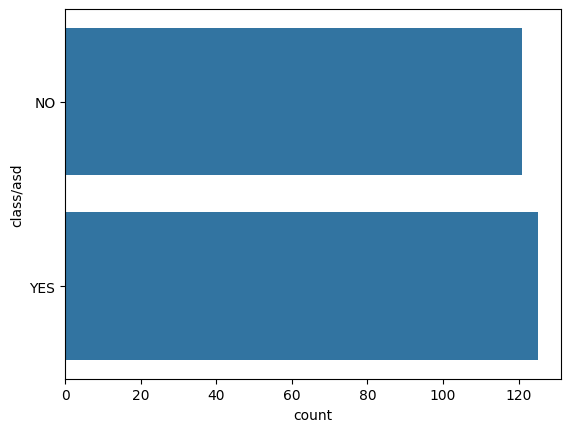

In [18]:
sns.countplot(ASD['class/asd']);

As is seen, the number of cases with and without ASD is almost balanced.

#### Feature Engineering

In [19]:
ASD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 0 to 291
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   a1_score         246 non-null    int64 
 1   a2_score         246 non-null    int64 
 2   a3_score         246 non-null    int64 
 3   a4_score         246 non-null    int64 
 4   a5_score         246 non-null    int64 
 5   a6_score         246 non-null    int64 
 6   a7_score         246 non-null    int64 
 7   a8_score         246 non-null    int64 
 8   a9_score         246 non-null    int64 
 9   a10_score        246 non-null    int64 
 10  age              246 non-null    int64 
 11  gender           246 non-null    object
 12  ethnicity        246 non-null    object
 13  jundice          246 non-null    object
 14  austim           246 non-null    object
 15  contry_of_res    246 non-null    object
 16  used_app_before  246 non-null    object
 17  result           246 non-null    int64 


As is seen, after data cleaning we have 8 categorical columns: gender, ethnicity, jundice,austim, contry_of_res, used_app_before, relation, class/asd (as Target)

Now, I should convert categorical variables into numerical formats. Because there is not any ranking in these categorical columns, so I use one-hot encoding. Also, because the number of countries is relatively high. I consider 10 most frequent ones and consider reminders as others. 

In [20]:
#gender
ASD = pd.get_dummies(ASD, columns=['gender'], dtype='int')
ASD.drop(columns=['gender_m'],inplace=True)
ASD.rename(columns={'gender_f':'is_female?'},inplace=True)

In [21]:
#austim
ASD = pd.get_dummies(ASD, columns=['austim'], dtype='int')
ASD.drop(columns=['austim_no'],inplace=True)
ASD.rename(columns={'austim_yes':'ASD_in_family?'},inplace=True)

In [22]:
#jundice
ASD = pd.get_dummies(ASD, columns=['jundice'], dtype='int')
ASD.drop(columns=['jundice_no'],inplace=True)
ASD.rename(columns={'jundice_yes':'had_jaundice?'},inplace=True)

In [23]:
#used_app_before
ASD = pd.get_dummies(ASD, columns=['used_app_before'], dtype='int')
ASD.drop(columns=['used_app_before_no'],inplace=True)
ASD.rename(columns={'used_app_before_yes':'used_app_before?'},inplace=True)

In [24]:
#contry_of_res
top_10_countries = ASD['contry_of_res'].value_counts().nlargest(10).index.tolist()
ASD['contry_of_res'] = ASD['contry_of_res'].apply(lambda x: x if x in top_10_countries else 'Others')
ASD = pd.get_dummies(ASD, columns=['contry_of_res'], dtype='int')

In [25]:
#ethnicity
ASD = pd.get_dummies(ASD, columns=['ethnicity'], dtype='int')

In [26]:
#relation
ASD = pd.get_dummies(ASD, columns=['relation'], dtype='int')

In [27]:
#class/asd
ASD = pd.get_dummies(ASD, columns=['class/asd'], dtype='int')
ASD.drop(columns=['class/asd_NO'],inplace=True)
ASD.rename(columns={'class/asd_YES':'ASD?'},inplace=True)

In [28]:
ASD.shape

(246, 43)

#### Standardization

In [32]:
from sklearn.preprocessing import StandardScaler
# For those columns which are not 0 or 1.
scaler = StandardScaler()
ASD_encoded = ASD.copy()
ASD_encoded[['age', 'result']] = scaler.fit_transform(ASD_encoded[['age', 'result']])

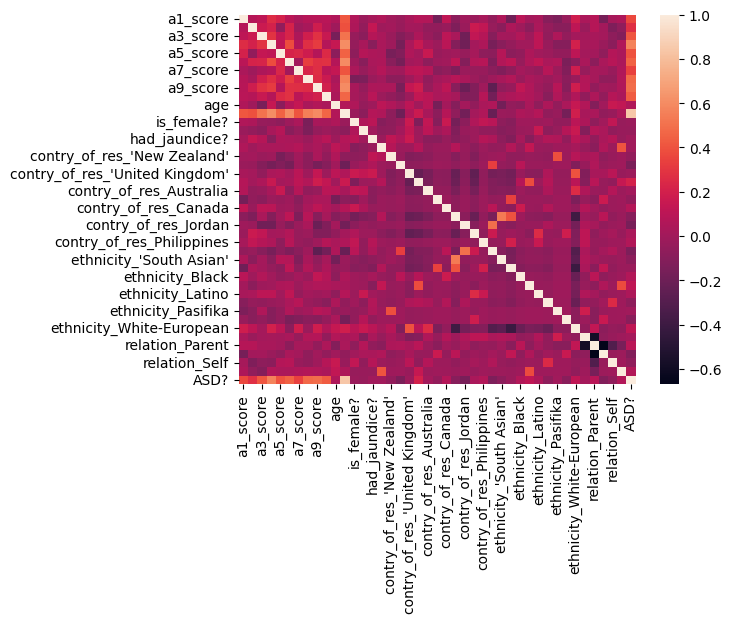

In [34]:
sns.heatmap(ASD_encoded.corr());